In [1]:
import numpy as np
import matplotlib.pyplot as plt

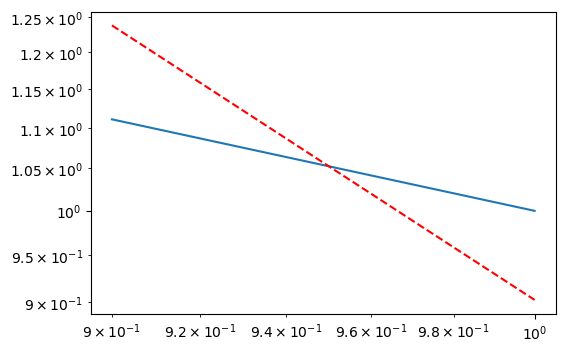

In [4]:
r=np.linspace(0.9,1,2000)
y1=1/r
y2=0.95**2/r**3

fig=plt.figure(dpi=100)
plt.loglog(r,y1)
plt.loglog(r,y2,'r--')
plt.show()